In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Inserting Data

In [3]:
data=pd.read_csv("churn_prediction_simple.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [4]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [5]:
data=data.dropna()  #Drop missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [6]:
#checking ddatasset distribution

data['churn'].value_counts()/len(data)  #churn is target variable

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [7]:
#separating Independent and Dependent variable

X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

### Scaling Dataset

In [8]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler_X=scaler.fit_transform(X)



### Splitting DataSet

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(scaler_X,Y,test_size=0.3)

X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((15446, 19), (6621, 19), (15446,), (6621,))

### Model Building & Predctions

In [10]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(class_weight='balanced')


In [11]:
classifier.fit(X_train,Y_train)
predictions=classifier.predict(X_test) #predicting Class
predictions_prob=classifier.predict_proba(X_test)  #predicting Probabilites

predictions_prob

array([[0.49746148, 0.50253852],
       [0.50309204, 0.49690796],
       [0.56046617, 0.43953383],
       ...,
       [0.50205799, 0.49794201],
       [0.71559019, 0.28440981],
       [0.37710712, 0.62289288]])

### Confusion Matrix


In [12]:
from sklearn.metrics import confusion_matrix

cf=confusion_matrix(Y_test,predictions)

cf

array([[3840, 1491],
       [ 441,  849]], dtype=int64)

In [13]:
#Accuracy

classifier.score(X_test,Y_test)

0.708201178069778

##### Evaluating Metrics


In [14]:
# calculating precision Score

from sklearn.metrics import precision_score
precision=precision_score(Y_test,predictions)

precision

0.3628205128205128

In [15]:
#calculating recall Score

from sklearn.metrics import recall_score
recall=recall_score(Y_test,predictions)
recall

0.6581395348837209

In [16]:
#manual calculating of F1 score


f1=2/((1/precision)+(1/recall))
f1

0.4677685950413223

In [17]:
#using sklearn 

from sklearn.metrics import f1_score

f1=f1_score(Y_test,predictions)
f1

0.4677685950413223

In [18]:
# calculating precision,recall,f1_Score and support at once

from sklearn.metrics import precision_recall_fscore_support as PRF_summary

precision,recall,f1,support=PRF_summary(Y_test,predictions)

In [19]:
precision

array([0.89698669, 0.36282051])

In [20]:
recall

array([0.72031514, 0.65813953])

In [21]:
f1

array([0.79900125, 0.4677686 ])

In [22]:
support

array([5331, 1290], dtype=int64)

In [24]:

from sklearn.metrics import classification_report

k=classification_report(Y_test,predictions)       # this function is only for representation only
print(k)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      5331
           1       0.36      0.66      0.47      1290

    accuracy                           0.71      6621
   macro avg       0.63      0.69      0.63      6621
weighted avg       0.79      0.71      0.73      6621



#### Precision-Recall Curve 

In [28]:

#gathering precision/recall  scores for different thresholds

from sklearn.metrics import precision_recall_curve

precision_points,recall_points,threshold_points=precision_recall_curve(Y_test,predictions_prob[:,1])

precision_points.shape,recall_points.shape,threshold_points.shape

((6622,), (6622,), (6621,))

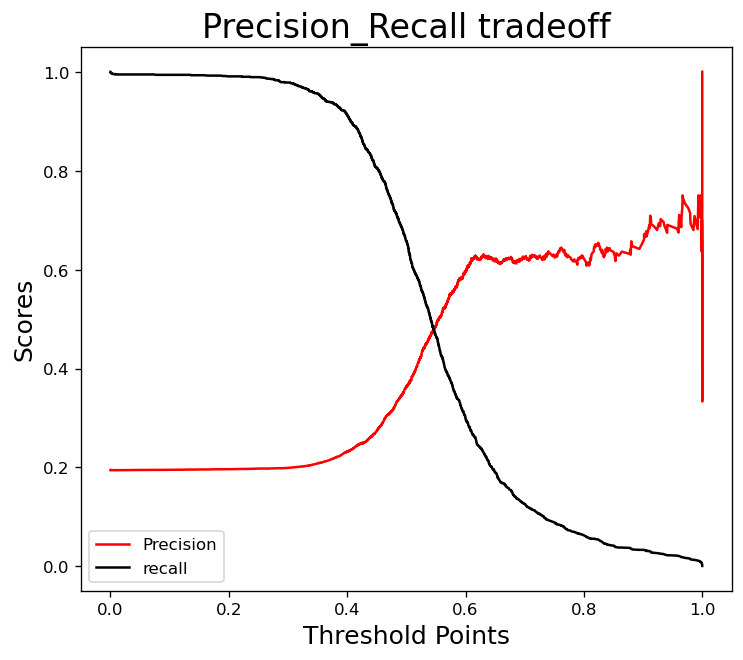

In [30]:
#plotting Curve


plt.figure(figsize=(7,6),dpi=120)
plt.plot(threshold_points,precision_points[:-1],color='red',label='Precision')
plt.plot(threshold_points,recall_points[:-1],color='black',label='recall')
plt.xlabel("Threshold Points",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Precision_Recall tradeoff",fontsize=20)
plt.legend()

## AUC-ROC CURVE

In [32]:
from sklearn.metrics import roc_auc_score,roc_curve

#roc_curve returns fpr,tpr values for different threshold

fpr,tpr,threshold=roc_curve(Y_test,predictions_prob[:,1])

#fpr= flase positive rate

#tpr = true positive rate



0.7432225435837482

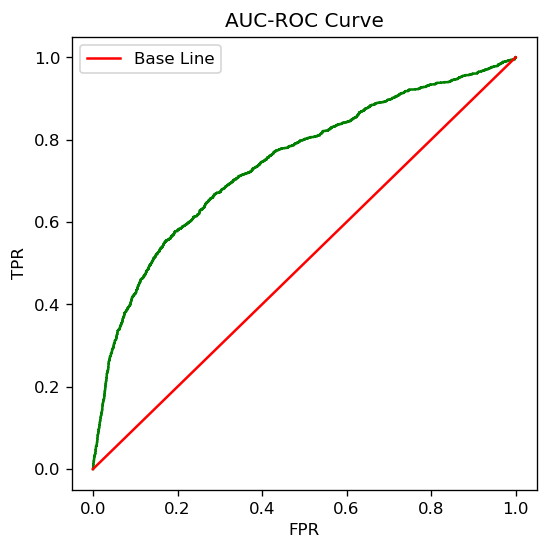

In [37]:
# plotting AUC-ROC curve

plt.figure(figsize=(5,5),dpi=120)

plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='Base Line',color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC Curve")
plt.legend()

roc_auc_score(Y_test,predictions_prob[:,1])

### Coefficent Plot

In [39]:
#arranging data

c=classifier.coef_.reshape(-1)
x=X.columns
coeff_plot=pd.DataFrame({'Coefficients':c,
                         'Variable':x
                        })


#sorrting values

coeff_plot=coeff_plot.sort_values(by='Coefficients')
coeff_plot

,Coefficients,Variable
9,-1.900322,current_balance
14,-0.307496,previous_month_credit
0,-0.178943,vintage
8,-0.128133,days_since_last_transaction
1,-0.088509,age
4,-0.084481,occupation
2,-0.061066,gender
12,-0.005621,average_monthly_balance_prevQ2
5,-0.004043,city
7,0.000980,branch_code


Text(0.5, 1.0, 'Coefficeient Curve')

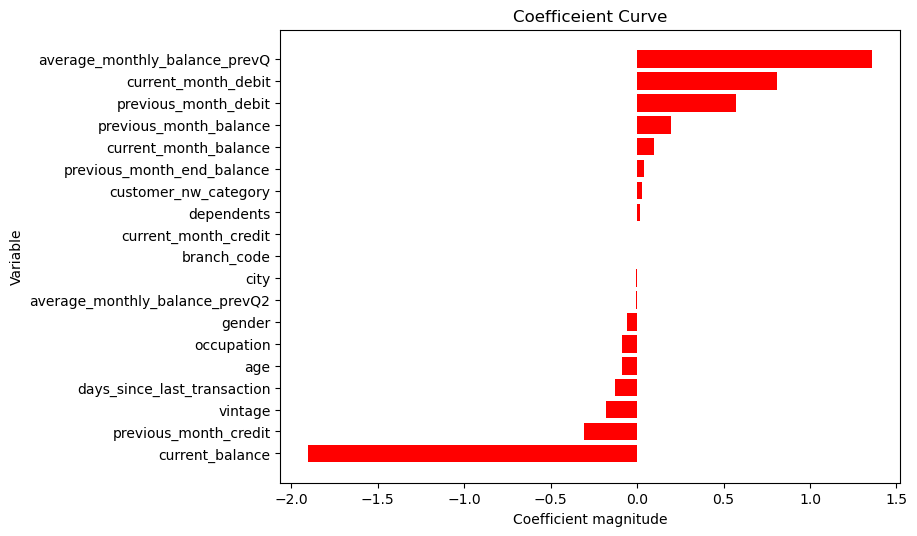

In [41]:
#plotting


plt.figure(figsize=(8,6),dpi=100)
plt.barh(coeff_plot['Variable'],coeff_plot['Coefficients'],color='red')
plt.xlabel("Coefficient magnitude")
plt.ylabel("Variable")
plt.title('Coefficeient Curve')